Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


# Exercicio 1

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    f1_score, auc, RocCurveDisplay, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier # type: ignore

%matplotlib inline

In [3]:
def print_roc_curve(y_true, y_pred):
    print('printing roc curve...')
    # fpr, tpr, threshold = roc_curve(y_true, y_pred)
    # roc_auc = auc(fpr, tpr)
    # display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, threshold=threshold)
    # display.plot()
    # plt.show()

    # plt.title('Receiver Operating Characteristic')
    # plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    # plt.legend(loc = 'lower right')
    # plt.plot([0, 1], [0, 1],'r--')
    # plt.xlim([0, 1])
    # plt.ylim([0, 1])
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()

In [4]:
def scores (y_true, y_pred):
    # print('accuracy: ',accuracy_score(y_true, y_pred)) 
    # print('precision: ',precision_score(y_true, y_pred,average=None))
    # print('recall: ',recall_score(y_true, y_pred, average=None))
    # print('f1_score: ',f1_score(y_true, y_pred, average=None))

    print(classification_report(y_true, y_pred))
    print_roc_curve(y_true, y_pred)
    plt.show()

In [5]:
mnist = load_digits()

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
mnist.data.shape

(1797, 64)

In [8]:
# Data
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
mnist.target.shape

(1797,)

In [10]:
# target
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


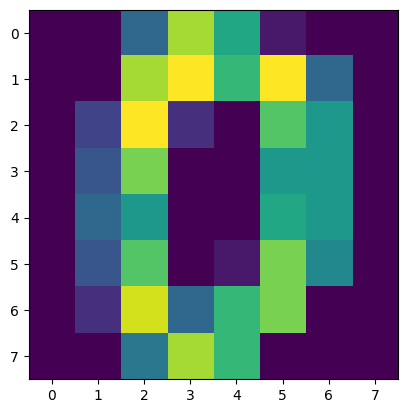

In [11]:
# images

plt.imshow(mnist.images[0])

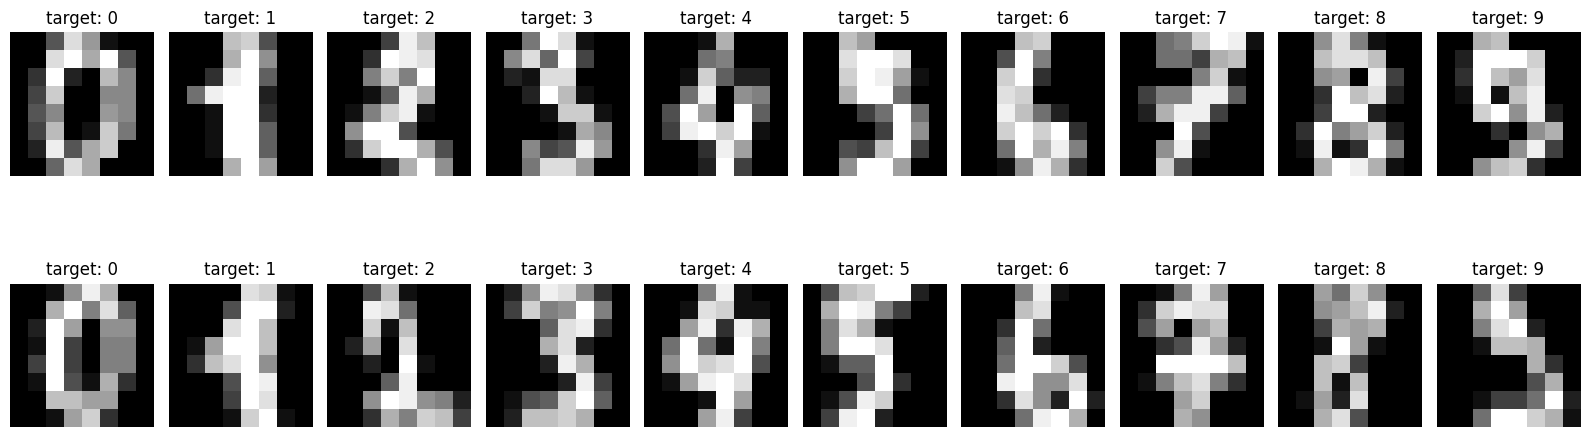

In [12]:

fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [13]:
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.87      0.78      0.82        50
           2       0.86      0.77      0.81        47
           3       0.78      0.87      0.82        54
           4       0.84      0.85      0.84        60
           5       0.91      0.89      0.90        66
           6       0.93      0.94      0.93        53
           7       0.88      0.84      0.86        55
           8       0.82      0.86      0.84        43
           9       0.76      0.85      0.80        59

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540

printing roc curve...


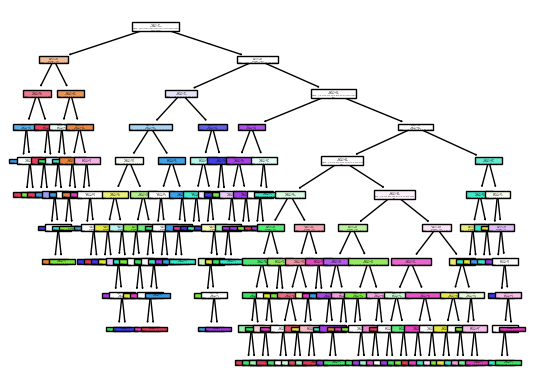

In [14]:
clf = DecisionTreeClassifier(random_state=42, max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

scores(y_test, y_pred)
from sklearn.tree import plot_tree
plot_tree(clf, filled=True)
plt.show()


# Exercicio 2

## Random Forest 

In [15]:
clf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      0.96      0.95        50
           2       0.98      0.98      0.98        47
           3       0.98      0.96      0.97        54
           4       0.95      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      1.00      0.99        55
           8       0.93      0.95      0.94        43
           9       0.98      0.93      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

printing roc curve...


## XGBoost

In [17]:
clf = XGBClassifier(random_state=42, max_depth=10, n_estimators=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

scores(y_test, y_pred )


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.96      1.00      0.98        50
           2       0.96      1.00      0.98        47
           3       1.00      0.93      0.96        54
           4       0.97      0.98      0.98        60
           5       1.00      0.95      0.98        66
           6       0.98      0.96      0.97        53
           7       0.96      0.98      0.97        55
           8       0.91      0.98      0.94        43
           9       0.95      0.92      0.93        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

printing roc curve...


# Exercicio 3

In [18]:
clf = DecisionTreeClassifier(min_impurity_decrease=0.1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

scores(y_test, y_pred)

clf.tree_.impurity

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.09      1.00      0.17        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        59

    accuracy                           0.09       540
   macro avg       0.01      0.10      0.02       540
weighted avg       0.01      0.09      0.02       540

printing roc curve...


/Users/felipe/Documents/projetos/mba-deeplearning-iad-006-2024-public/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/felipe/Documents/projetos/mba-deeplearning-iad-006-2024-public/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/felipe/Documents/projetos/mba-deeplearning-iad-006-2024-public/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

array([0.89984551])